In [34]:
import construction as cs
import matplotlib.pyplot as plt

### read font
from matplotlib import font_manager

font_dirs = ['Barlow/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load generated graphs

In [35]:
def load_origin_graph(file_name,gap=299):
    data_in = cs.load_data("../Datasets/"+file_name+".dat")
    gap = 299 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_ETNgen_graph(file_name):
    path = "../variation_of_K_res/LH10/"+file_name+".dat"
    gap = 299 
    data_in = cs.load_data(path)
    graphs_in = cs.build_graphs(data_in,gap=gap)
    
    return graphs_in

In [36]:
import networkx as nx
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from topological_metrics import *

import os

# Compute and store topological results

In [37]:

ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal


In [16]:
ks = [1,2,3,4,5]

graphs = dict()

for i in ks:
    file_name = "ETNgen-LH10-k-"+str(i)
    graphs[i] = load_ETNgen_graph(file_name)

In [17]:
orig_graph = load_origin_graph("LH10")

In [18]:
def comp_metric(metric,o,graphs,norm=True):
    orig = metric(o)
    etn_res = dict()
    
    for k,e in graphs.items():
        etn_res[k] = metric(e)
    
    if norm:
            
        for k,e in etn_res.items():
            etn_res[k] = list(np.array(etn_res[k])/max(etn_res[k]))

    return orig,etn_res

In [19]:
for k,etn_gen in graphs.items():
    print("*"*30,k)
    res = compute_all_metrics(orig_graph,etn_gen)
    np.save("../variation_of_K_res/LH10/topology_res/LH10-"+str(k)+".npy",res)

****************************** 1
density 	 0.193 0.000000
global clu	 0.382 0.000000
avg short p	 0.463 0.000000
metric p 	 0.207 0.000000
metric n 	 0.137 0.000001


/home/antonio/anaconda3/lib/python3.8/site-packages/networkx/algorithms/assortativity/correlation.py:288: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / numpy.sqrt(vara * varb)


assortat 	 0.290 0.000000
s metric	 0.188 0.000000
metric f 	 0.193 0.000000
strenght 	 0.325 0.000000
duration 	 0.571 0.000000
****************************** 2
density 	 0.120 0.000000
global clu	 0.393 0.000000
avg short p	 0.453 0.000000
metric p 	 0.154 0.000000
metric n 	 0.106 0.000440
assortat 	 0.257 0.000000
s metric	 0.090 0.000134
metric f 	 0.120 0.000000
strenght 	 0.134 0.000000
duration 	 0.306 0.000000
****************************** 3
density 	 0.117 0.000000
global clu	 0.409 0.000000
avg short p	 0.177 0.000000
metric p 	 0.095 0.000049
metric n 	 0.132 0.000006
assortat 	 0.268 0.000000
s metric	 0.148 0.000000
metric f 	 0.117 0.000000
strenght 	 0.202 0.000000
duration 	 0.124 0.000000
****************************** 4
density 	 0.274 0.000000
global clu	 0.414 0.000000
avg short p	 0.068 0.061454
metric p 	 0.240 0.000000
metric n 	 0.285 0.000000
assortat 	 0.376 0.000000
s metric	 0.288 0.000000
metric f 	 0.274 0.000000
strenght 	 0.292 0.000000
duration 	 0.08

# load topology results

In [38]:
labels = ["density","global clu","avg short","metric p","metric n","assortat","s metric","metric f","strenght","duration "]
def load_topo_res(ks):
    
    res = dict()
    #for k in :
    for k in ks:
        tmp = np.load("../variation_of_K_res/LH10/topology_res/LH10-"+str(k)+".npy")
        res[k]=tmp
        
    return res

In [39]:
ks = ["1","2","3","4","5"]
res = load_topo_res(ks)

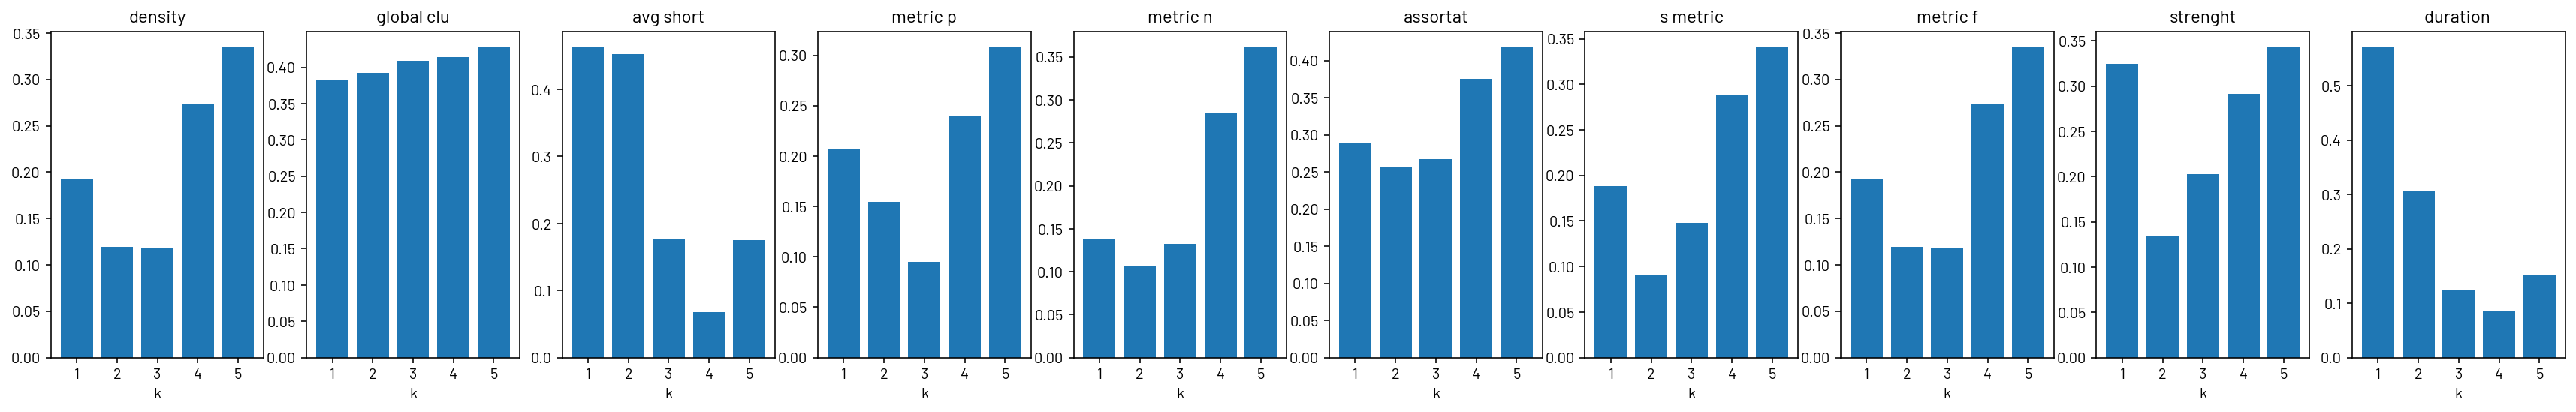

In [40]:
fig, ax = plt.subplots(1,10,figsize=(30,4))
for i in range(len(labels)):
    tmp = [v[i][0] for k,v in res.items()]
    x = np.arange(len(tmp))
    ax[i].set_title(labels[i])
    ax[i].bar(x,tmp)
    ax[i].set_xticks(x,ks)
    ax[i].set_xlabel("k")
    
#plt.savefig("varing_k_invs13.pdf")

In [41]:


line_width = 1.5


ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal


In [42]:
labels = ["Density",
          "Global clustering \ncoefficient",
          "Average shortest\npath length",
          "Interacting\nindividuals",
          "New conversations",
          "Assortativity",
          "S-metric",        
          "Frequency of interactions",
          "Edge strength",
          "Duration of contacts"]

labels = labels

In [43]:
X = []
for i in range(len(labels)):
    tmp = [v[i][0] for k,v in res.items()]
    X.append(tmp)
X = np.transpose(X)

In [44]:
def flip_data(X,idx = [2, 5, 1, 8, 9, 6, 4, 3, 0, 7]):
    X[0] = np.flip(X[0][idx])
    X[1] = np.flip(X[1][idx])
    X[2] = np.flip(X[2][idx])
    X[3] = np.flip(X[3][idx])
    X[4] = np.flip(X[4][idx])
    
    return X


idx =[2, 5, 1, 8, 9, 6, 4, 3, 0, 7]
tmp= ["Density",
      "Global clustering \ncoefficient",
      "Average shortest\npath length",
      "Interacting\nindividuals",
      "New conversations",
      "Assortativity",
      "S-metric",        
      "Number of interactions",
      "Edge strength",
      "Duration of contacts"]


tmp = np.array(tmp)
labels = np.flip(tmp[idx])
X = flip_data(X)


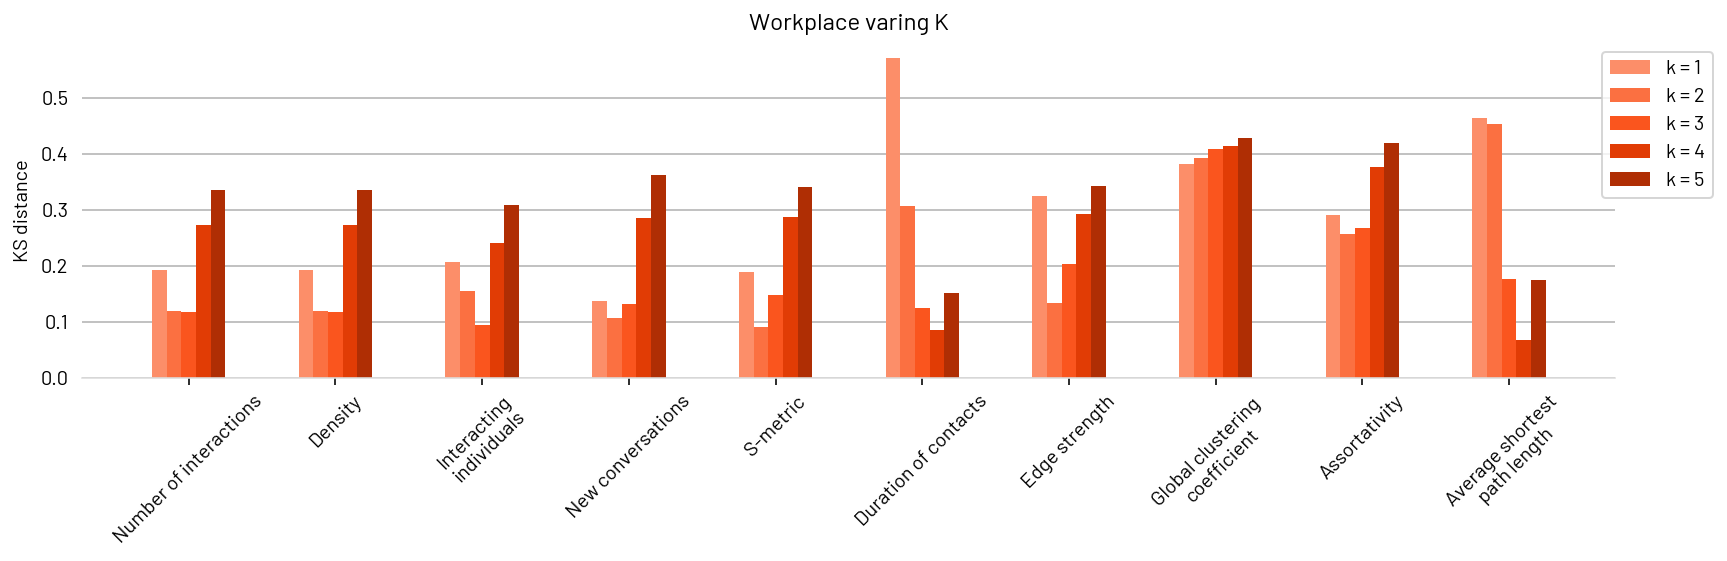

In [45]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


x = np.arange(len(X[0]))  # the label locations
width = 0.1  # the width of the bars


fig, ax = plt.subplots(1,1,figsize=(12,4))


ax.title.set_text("Workplace varing K")
rects1 = ax.bar(x - 0.2, X[0], width,color="#fc8e69",label="k = 1")
rects2 = ax.bar(x - 0.1, X[1], width,color="#fb7041",label="k = 2")
rects3 = ax.bar(x - 0, X[2], width,color="#fa551e",label="k = 3")
rects4 = ax.bar(x + 0.1, X[3], width,color="#e13c05",label="k = 4")
rects4 = ax.bar(x + 0.2, X[4], width,color="#af2e04",label="k = 5")
#rects4 = ax.bar(x + 0.25, X[5], width,color="#7d2103",label="k = 50")

ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=45)
#ax.set_ylim(0,1)
#ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.tick_params(bottom=False, right=False,left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

ax.legend(loc='upper right',ncol = 1,bbox_to_anchor=(1.07, 1))

ax.tick_params(bottom=True, right=False,left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#b3b3b3')
ax.xaxis.grid(False)
ax.set_ylabel("KS distance")
fig.tight_layout()
plt.savefig("../variation_of_K_res/LH10/topology_varing_K.pdf", bbox_inches = 'tight')
plt.show()